<a href="https://colab.research.google.com/github/zampolo/fct-pds/blob/master/pds_filter_design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UFPA - ITEC - FCT

EC01045 Processamento Digital de Sinais

Prof.: Ronaldo de Freitas Zampolo

---

# Filtragem discreta
Este notebook apresenta exemplos de projetos de filtros discretos para o processamento de sinais contínuos usando SciPy/Python.
Especificamente:
- Projeto de filtro passa-baixas FIR (resposta ao impulso finita) por janelamento (janela de Hamming)
- Projeto de filtro passa-baixas IIR (resposta ao impulso infinita) usando aproximação de Chebyshev II

São dadas as especificações para o passa-baixas desejado e, para cada filtro projetado, é apresentada a magnitude da resposta em frequência para verificação do atendimento dos requisitos de projeto.

Ao final, são sugeridos exercícios para fixação de conceitos e obtenção de familiaridade com as funções para projeto de filtros do Python.

In [ ]:
# Carregamento de bibliotecas
from scipy import signal
from scipy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt
import numpy as np

## Especificações do filtro a ser projetado:
  - Filtro passa-baixas
  - $\delta_\text{pass} = 1\text{ dB}$
  - $\delta_\text{stop} = -30\text{ dB}$
  - $f_\text{pass} = 1\text{ kHz}$
  - $f_\text{stop} = 5\text{ kHz}$
  - $f_s = 20\text{ kHz}$

Deve-se verificar se os parâmetros devolvidos pelas funções de projeto, levam a filtros cujas respostas em frequência atendem às especificações acima.

In [ ]:
# definição de variáveis associadas aos requisitos de projeto
delta_pass = 1    # variação do ganho na banda de passagem
delta_stop = 30   # atenuação mínima na banda de rejeição
freq_pass = 1e3   # frequência limite da banda de passagem
freq_stop = 5e3   # frequência limite da banda de rejeição
freq_samp = 20e3  # frequência de amostragem

## Filtros FIR
- Os dois principais parâmetros de um filtro FIR por janelamento:
  - Comprimento da janela
  - Tipo de janela

In [ ]:
# Projeto de filtros usando funções-janelas
#
# scipy.signal.firwin(numtaps, cutoff, width=None, window='hamming', pass_zero=True, scale=True, nyq=None, fs=None)

numtaps = 21 # comprimento do filtro (arbitrário; deve ser escolhido de maneira a atender aos requisitos do projeto)
freq_corte = ( freq_pass + freq_stop ) / 2  # frequência de corte: definida aqui como a frequência exatamente no meio da banda de transição
h = signal.firwin(numtaps, cutoff = freq_corte, window = 'hamming', pass_zero = 'lowpass', fs = freq_samp )  # projeto de filtro FIR por janelamento

# h é a resposta ao impulso do filtro projetado; corresponde aos coeficientes "b_i" (coeficiente "forward") de uma função de transferência
# Mais sobre a função acima: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html#scipy.signal.firwin
# possibilidades de janela: 'hamming', 'boxcar', 'triang', 'hann', 'blackman'...

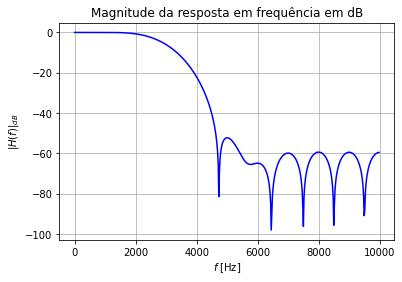

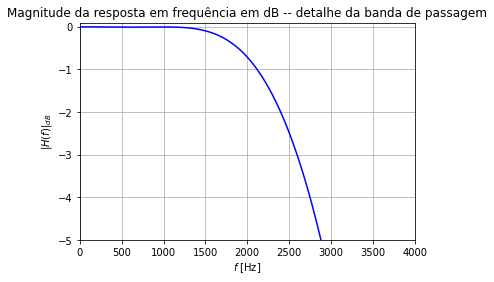

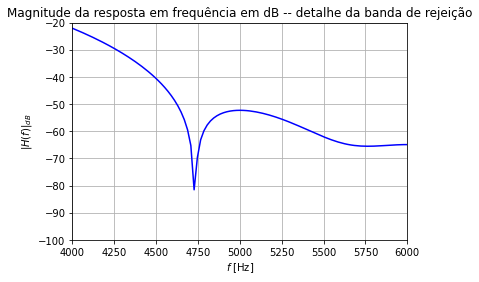

In [ ]:
# Resposta em frequência
# scipy.signal.freqz(b, a=1, worN=512, whole=False, plot=None, fs=6.283185307179586, include_nyquist=False)

w, H = signal.freqz(b = h, a=1, fs=freq_samp) # determinação da resposta em frequência: w é o vetor de frequências e H é a resposta em frequência

# Exibição de gráficos
#  Magnitude da resposta em frequência completa
plt.figure()
plt.plot(w,20*np.log10(abs(H)), 'b')
plt.ylabel('$|H(f)|_{dB}$')
plt.xlabel('$f$ [Hz]')
plt.title('Magnitude da resposta em frequência em dB')
plt.grid(True)

#    Detalhe da banda de passagem
plt.figure()
plt.plot(w,20*np.log10(abs(H)), 'b')
plt.ylabel('$|H(f)|_{dB}$')
plt.xlabel('$f$ [Hz]')
plt.axis([0, 4*freq_pass, -5, 0.1])  # ajuste de coordenadas
plt.title('Magnitude da resposta em frequência em dB -- detalhe da banda de passagem')
plt.grid(True)

#   Detalhe da banda de rejeição
plt.figure()
plt.plot(w,20*np.log10(abs(H)), 'b')
plt.ylabel('$|H(f)|_{dB}$')
plt.xlabel('$f$ [Hz]')
plt.axis([4000, 6000, -100, -20])  # ajuste de coordenadas
plt.title('Magnitude da resposta em frequência em dB -- detalhe da banda de rejeição')
plt.grid(True)

plt.show()

## Sinal de entrada
\begin{align*}
  x(t) &= A_1\sin(2\pi f_1t)+A_2\sin(2\pi f_2t)\quad \text{(sinal contínuo)}\\
  x[n] &= A_1\sin(2\pi f_1Tn)+A_2\sin(2\pi f_2Tn)\quad \text{(sinal amostrado)}\\
  T &= f_s^{-1}\quad \text{(período de amostragem)}
\end{align*}

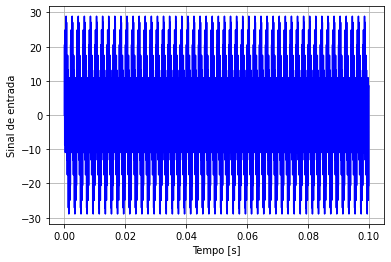

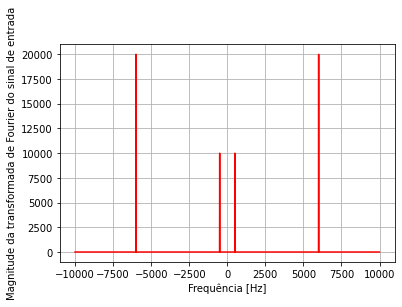

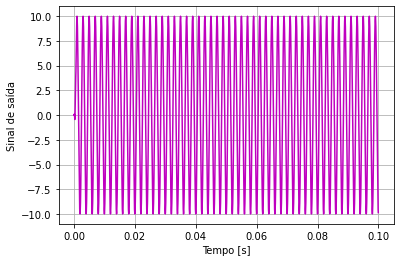

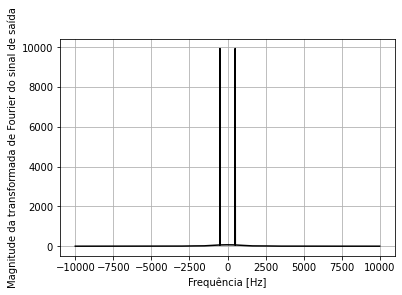

In [ ]:
# Operação de filtragem

# Definição de um sinal de entrada fictício para mostrar o funcionamento do filtro
# Parâmetros do sinal de entrada
f1 = 500 # frequência da primeira senoide
A1 = 10  # amplitude da primeira senoide
f2 = 6000 # frequência da segunda senoide
A2 = 20   # amplitude da segunda senoide

T = 1/freq_samp  # periodo de amostragem
t = np.arange(0, 0.1, T) # vetor tempo (de 0 a 0.1 segundos)

# O sinal de entrada é a soma de dois senos. Uma senoide será preservado pelo filtro e a outra eliminada
entrada = A1 * np.sin( 2 * np.pi * f1 * t ) + A2 * np.sin( 2 * np.pi * f2 * t ) # sinal de entrada
saida   = signal.lfilter( b = h, a = 1, x = entrada )  # função de filtragem

# Transformada de Fourier dos sinais de entrada e saída 
Entrada = fftshift( fft( entrada ) ) # FFT da entrada 
Saida = fftshift( fft( saida ) )  # FFT da saída
freq = ( freq_samp ) * fftshift( fftfreq( t.shape[ -1 ] ) ) # vetor de frequência para fins de traçado de gráfico

# Gráficos
# Sinal de entrada no domínio do tempo
plt.figure()
plt.plot(t,entrada, 'b')
plt.ylabel('Sinal de entrada')
plt.xlabel('Tempo [s]')
#plt.title('')
plt.grid(True)

# Magnitude da transformada de Fourier do sinal de entrada
plt.figure()
plt.plot( freq, abs( Entrada ), 'r' )
plt.ylabel('Magnitude da transformada de Fourier do sinal de entrada')
plt.xlabel('Frequência [Hz]')
#plt.title('')
plt.grid(True)

# Sinal de saída no domínio do tempo
plt.figure()
plt.plot(t,saida, 'm')
plt.ylabel('Sinal de saída')
plt.xlabel('Tempo [s]')
#plt.title('')
plt.grid(True)

# Magnitude da transformada de Fourier do sinal de saída
plt.figure()
plt.plot( freq, abs( Saida ), 'k' )
plt.ylabel('Magnitude da transformada de Fourier do sinal de saída')
plt.xlabel('Frequência [Hz]')
#plt.title('')
plt.grid(True)

plt.show()

## Filtros IIR

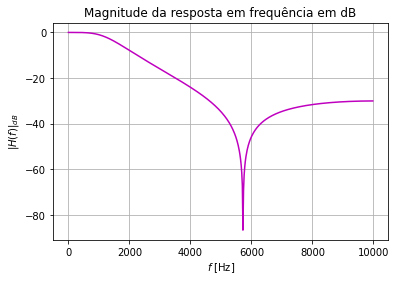

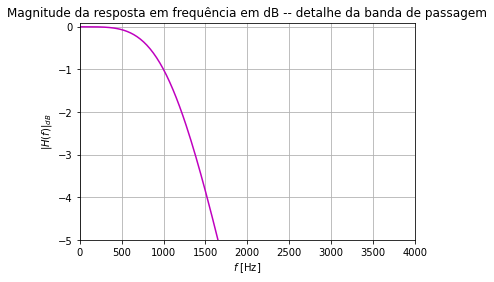

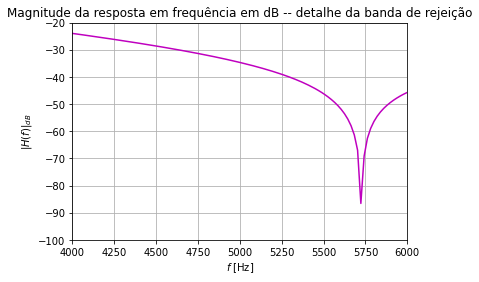

In [ ]:
# Projeto de filtros usando aproximações
# 
# Chebyshev II

b2,a2 = signal.iirdesign(wp = freq_pass, ws = freq_stop, gpass = delta_pass, 
                         gstop = delta_stop, analog=False, ftype='cheby2', 
                         output='ba', fs=freq_samp)

# Resposta em frequência
# scipy.signal.freqz(b, a=1, worN=512, whole=False, plot=None, fs=6.283185307179586, include_nyquist=False)

w2, H2 = signal.freqz(b = b2, a=a2, fs=freq_samp) # Cálculo da resposta em frequência

# Gráficos da magnitude da resposta em frequência
#  Resposta completa
plt.figure()
plt.plot(w2,20*np.log10(abs(H2)), 'm')
plt.ylabel('$|H(f)|_{dB}$')
plt.xlabel('$f$ [Hz]')
plt.title('Magnitude da resposta em frequência em dB')
plt.grid(True)

#  Detalhe da banda de passagem
plt.figure()
plt.plot(w2,20*np.log10(abs(H2)), 'm')
plt.ylabel('$|H(f)|_{dB}$')
plt.xlabel('$f$ [Hz]')
plt.axis([0, 4*freq_pass, -5, 0.1])  # ajuste de coordenadas
plt.title('Magnitude da resposta em frequência em dB -- detalhe da banda de passagem')
plt.grid(True)

#  Detalhe da banda de rejeição
plt.figure()
plt.plot(w2,20*np.log10(abs(H2)), 'm')
plt.ylabel('$|H(f)|_{dB}$')
plt.xlabel('$f$ [Hz]')
plt.axis([4000, 6000, -100, -20])  # ajuste de coordenadas
plt.title('Magnitude da resposta em frequência em dB -- detalhe da banda de rejeição')
plt.grid(True)

plt.show()


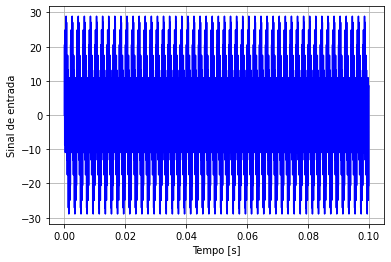

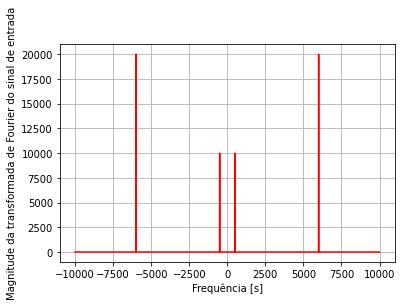

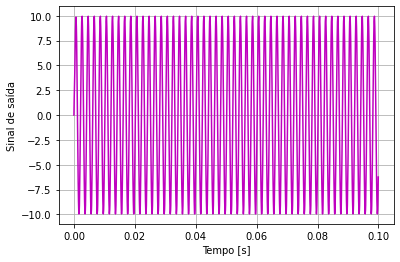

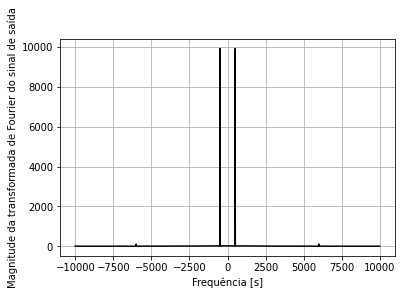

In [ ]:
# Filtragem do sinal de entrada, usando o segundo filtro

saida2= signal.lfilter( b = b2, a = a2, x = entrada ) # operação de filtragem 

Saida2 = fftshift( fft( saida2 ) ) # FFT do novo sinal de saída

# Gráficos

# Sinal de entrada no domínio do tempo
plt.figure()
plt.plot(t,entrada, 'b')
plt.ylabel('Sinal de entrada')
plt.xlabel('Tempo [s]')
#plt.title('')
plt.grid(True)

# FFT do sinal de entrada
plt.figure()
plt.plot( freq, abs( Entrada ), 'r' )
plt.ylabel('Magnitude da transformada de Fourier do sinal de entrada')
plt.xlabel('Frequência [s]')
#plt.title('')
plt.grid(True)

# Sinal de saída no domínio do tempo obtido usando o segundo filtro
plt.figure()
plt.plot(t,saida2, 'm')
plt.ylabel('Sinal de saída')
plt.xlabel('Tempo [s]')
#plt.title('')
plt.grid(True)

# FFT do sinal de saída
plt.figure()
plt.plot( freq, abs( Saida2 ), 'k' )
plt.ylabel('Magnitude da transformada de Fourier do sinal de saída')
plt.xlabel('Frequência [s]')
#plt.title('')
plt.grid(True)

plt.show()

## Exercícios
1. Compare os dois filtros projetados em relação ordem dos filtros (número de coeficientes necessários para implementação de cada um deles). 
1. Em relação ao filtro FIR:
  
  - Mantenha o mesmo tipo de janela e varie seu comprimento (valores ímpares menores e maiores). Observe e relate os efeitos na resposta em frequência. Os requisitos ainda são atendidos?

  - Fixe um comprimento de janela e varie o tipo de janela. Observe e relate os efeitos na resposta em frequência. Os requisitos ainda são atendidos?

1. Em relação ao filtro FIR:

  - Varie a aproximação (Butterworth, Chebyshev I e Elíptico) e observe os efeitos na resposta em frequência. Atenção especial à ordem resultante e atendimento a requisitos.


  